<a href="https://colab.research.google.com/github/shobhit-saini/Neural_Network/blob/master/Planar_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

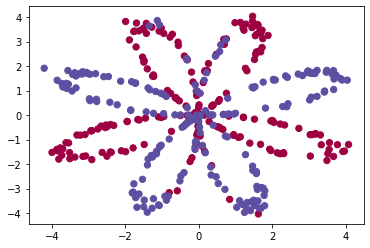

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
def load_planar_dataset():
    np.random.seed(1)
    m = 400 
    N = int(m/2) 
    Dim = 2
    x = np.zeros((m,Dim)) 
    y = np.zeros((m,1), dtype='uint8') 
    a = 4 

    for i in range(2):
        temp = range(N*i,N*(i+1))
        t = np.linspace(i*3.12,(i+1)*3.12,N) + np.random.randn(N)*0.2 
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 
        x[temp] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[temp] = i
    x = x.T
    y = y.T

    return x, y
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

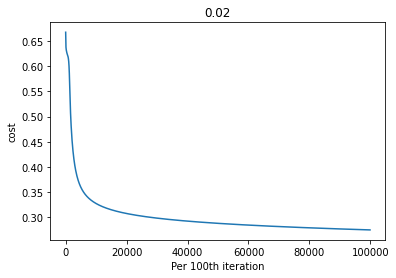

In [95]:
'''
Dims:
X:(2, 400)
Y:(1, 400)
weight1:(4, 2)
weight2:(1, 4)
bias1:(4, 1)
bias2:(1, 1)
'''
def sigmoid(x):
  return 1/(1+np.exp(-x))
Input_features = 2
Hidden_layer_features = 4
Output_layer_features = 1
m = X.shape[1]

# Weight and bias initialization
weight1 = np.random.randn(Hidden_layer_features, Input_features)*np.sqrt(1/Input_features) #(4, 2)
weight2 = np.random.randn(Output_layer_features, Hidden_layer_features)*np.sqrt(1/Hidden_layer_features)#(1, 4)
bias1 = np.zeros((Hidden_layer_features,1))#(4, 1)
bias2 = np.zeros((Output_layer_features, 1))#(1, 1)
Learning_Rate = 0.02
cost = []
iteration = []

for i in range(100000):
  Z1 = np.dot(weight1, X)#(4,2)*(2,400) = (4, 400)
  assert(Z1.shape == (4,400))
  A1 = np.tanh(Z1)#(4,400)
  assert(A1.shape == (4,400))
  Z2 = np.dot(weight2, A1)#(1,4)*(4,400) = (1,400)
  assert(Z2.shape == (1,400))
  A2 = sigmoid(Z2)
  if i % 100 == 0:
    t = np.sum(-(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))))/m
    cost.append(t)
    iteration.append(i)
  '''____________________________Back_propagation_______________________________'''
  dZ2 = A2-Y #(1,400)
  assert(dZ2.shape == Z2.shape)
  dW2 = (np.dot(dZ2,A1.T))/m #(1,400)*(400,4) = (1,4)
  assert(dW2.shape == weight2.shape)
  db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
  assert(db2.shape == bias2.shape)
  dA1 = np.dot(weight2.T, dZ2) #(4,1)*(1,400) = (4,400)
  assert(dA1.shape == A1.shape)
  dZ1 = np.multiply(dA1, (1-(np.tanh(Z1))**2))
  assert(dZ1.shape == Z1.shape)
  dW1 = (np.dot(dZ1,X.T))/m
  assert(dW1.shape == weight1.shape)
  db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
  assert(db1.shape == bias1.shape)
  '''_________________________Update_parameters_________________________________'''
  weight1 -= Learning_Rate*dW1
  weight2 -= Learning_Rate*dW2
  bias1 -= Learning_Rate*db1
  bias2 -= Learning_Rate*db2
plt.plot(iteration, cost)
plt.xlabel("Per 100th iteration")
plt.ylabel("cost")
plt.title(Learning_Rate)
plt.show()

Training_Accuracy:  88.25
Decision Boundary


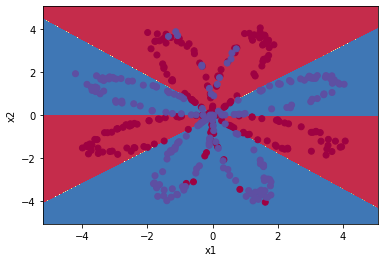

In [96]:
def accuracy(X,Y):
  Z1 = np.dot(weight1, X)#(4,2)*(2,400) = (4, 400)
  A1 = np.tanh(Z1)#(4,400)
  Z2 = np.dot(weight2, A1)#(1,4)*(4,400) = (1,400)
  A2 = sigmoid(Z2)
  predict_out = np.zeros((A2.shape[0], A2.shape[1]))
  for i in range(Z2.shape[1]):
    if A2[0][i] > 0.5:
      predict_out[0][i] = 1
    else:
      predict_out[0][i] = 0
  accuracy = (100 - np.mean(abs(Y-predict_out))*100)
  return accuracy
 
print("Training_Accuracy: ",accuracy(X,Y))
def model(X):
  Z1 = np.dot(weight1, X)#(4,2)*(2,400) = (4, 400)
  A1 = np.tanh(Z1)#(4,400)
  Z2 = np.dot(weight2, A1)#(1,4)*(4,400) = (1,400)
  A2 = sigmoid(Z2)
  predict_out = np.zeros((A2.shape[0], A2.shape[1]))
  for i in range(Z2.shape[1]):
    if A2[0][i] > 0.5:
      predict_out[0][i] = 1
    else:
      predict_out[0][i] = 0
  return predict_out
def plot_decision_boundary(X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
  # Plot the decision boundary
print("Decision Boundary")
plot_decision_boundary(X, Y)

